# Assignment 01 
### Question 2.1

### Load a Set of Images and display them in RGB and GrayScale


In [127]:
from myfunctions import *
from skimage.util import random_noise

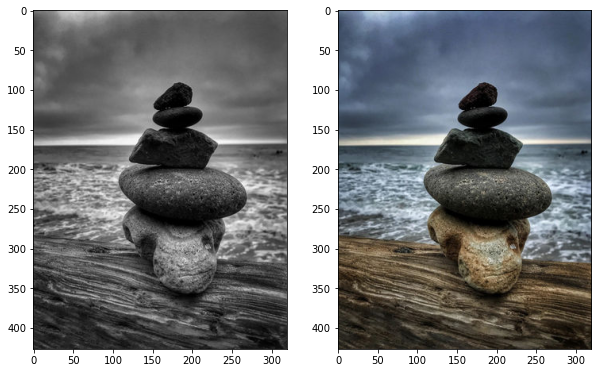

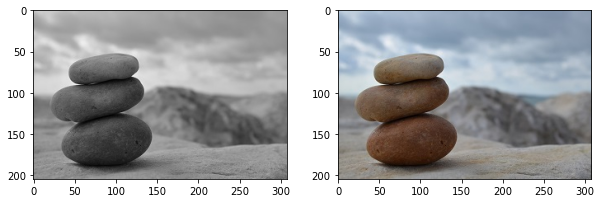

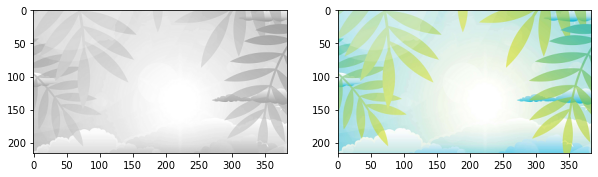

In [128]:
displayImage("images/01.jpg")
displayImage("images/02.jpg")
displayImage("images/03.png")

## Question 2.2
### Using rgbExclusion function remove the provided color from image

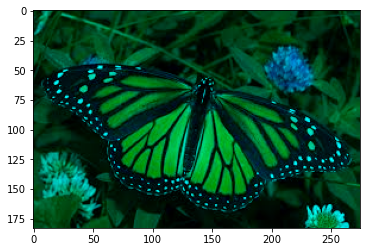

In [129]:
image=rgbExclusion("images/05.jpeg","R")
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

## Question 2.3
### Using Histogram Equalization show histograms before and after applying the method on at least 3 images

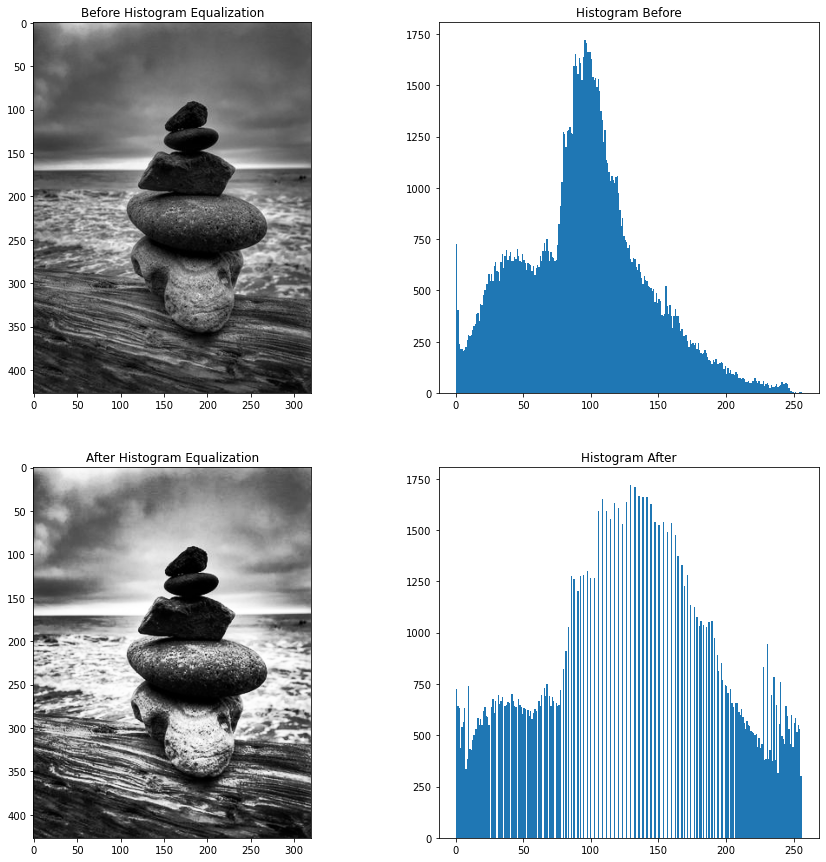

In [130]:
showHistograms('images/01.jpg')

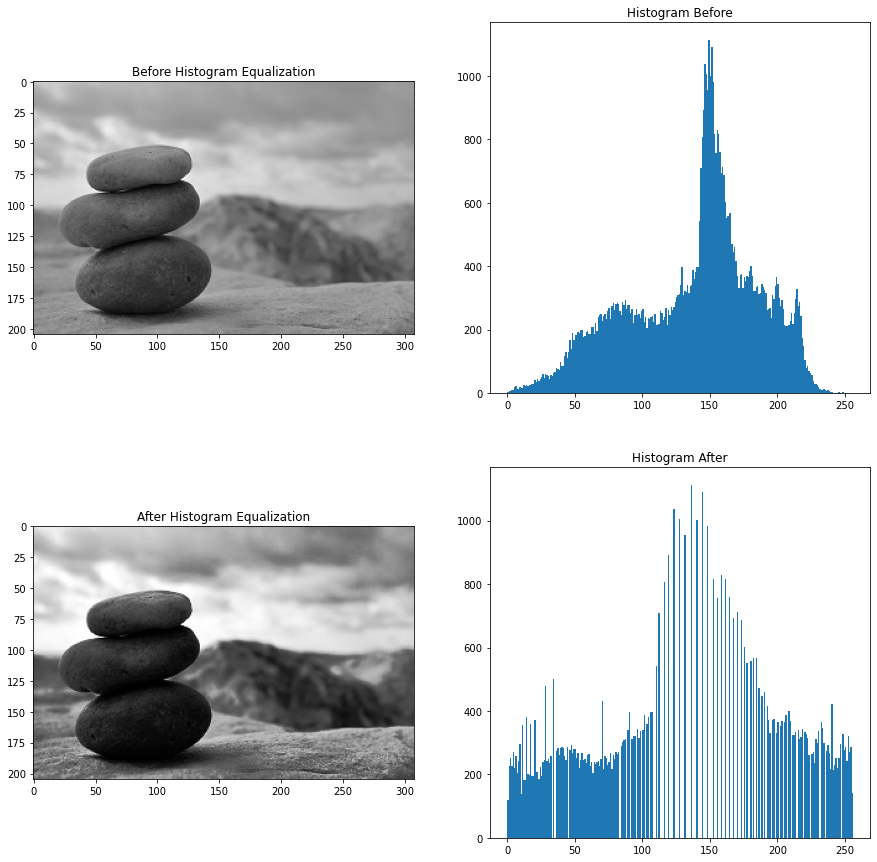

In [7]:
showHistograms('images/02.jpg')

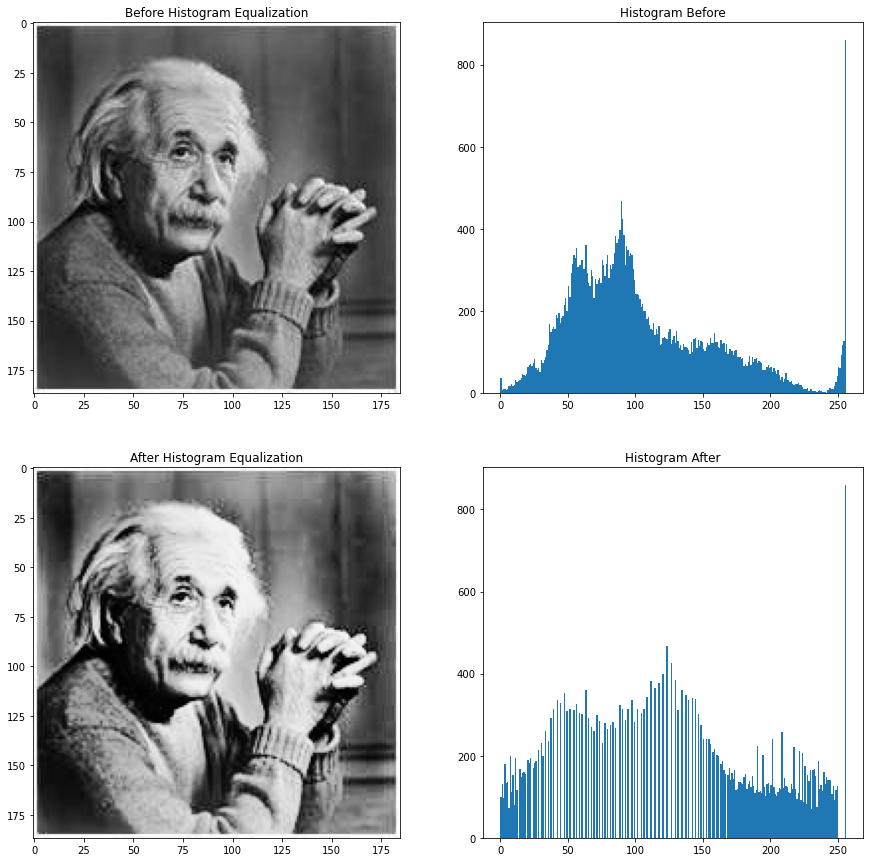

In [131]:
showHistograms('images/04.jpg')

## Question 2.4
### Implement convolution operation from scratch and compare it with built in functions.

### SHARPENING:

In [132]:
imgMatrix = generateMatrix("images/01.jpg") #Generate Image matrix from my defined functions 

kernalMatrix = np.array([[0, -1, 0], 
                         [-1, 5, -1], 
                         [0, -1, 0]]) #Image Sharpening kernal

sharpeImage=convolution(imgMatrix,kernalMatrix) #Sharpe image using my function designed from scratch
cv2.imwrite('images/01_Sharpe.jpg', sharpeImage) # Save sharpen image in images directory

im = cv2.imread('images/01.jpg',0) #Load image again
im_sharpe = cv2.filter2D(im, -1, kernalMatrix) #Using built in filter function of cv again sharpe the image
cv2.imwrite('images/01_Sharpe01.jpg', im_sharpe) #Save new sharpen image as well

True

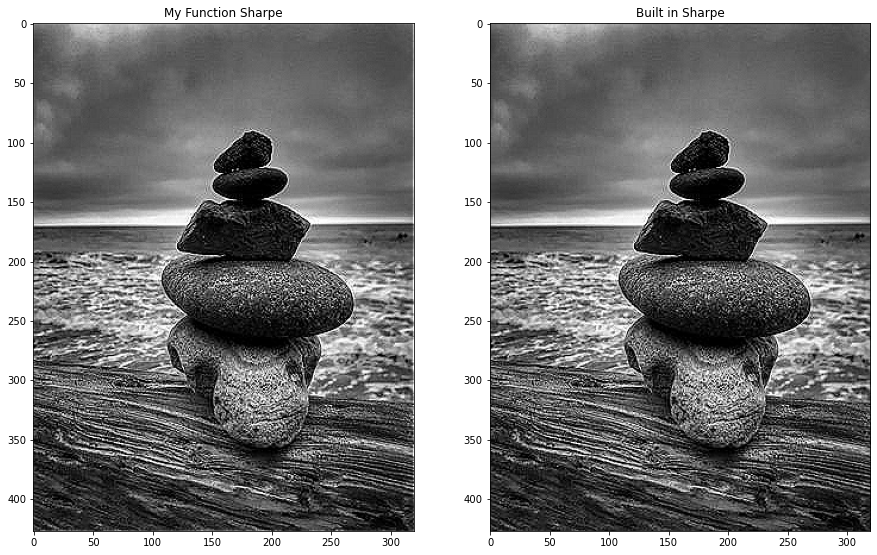

In [133]:
CompareImage('images/01_Sharpe.jpg','images/01_Sharpe01.jpg','My Function Sharpe','Built in Sharpe') #My Compare function from myfunctions.py

### BLURRING:

In [134]:
imgMatrix = generateMatrix("images/02.jpg") #Generate Image matrix from my defined functions 
kernalMatrix = np.array([[1, 2, 1], 
                         [2, 4, 2], 
                         [1, 2, 1]])/16.0#Gaussian Blur
BlurImage=convolution(imgMatrix,kernalMatrix) #Blur image using my function designed from scratch
cv2.imwrite('images/02_Blur.jpg', BlurImage) # Save Blurred image in images directory

im = cv2.imread('images/02.jpg',0) #Load image 
im_blur = cv2.GaussianBlur(im,(3,3),cv2.BORDER_DEFAULT) #Using built in filter function of cv again sharpe the image
cv2.imwrite('images/02_Blur01.jpg', im_blur) #Save new sharpen image as well

True

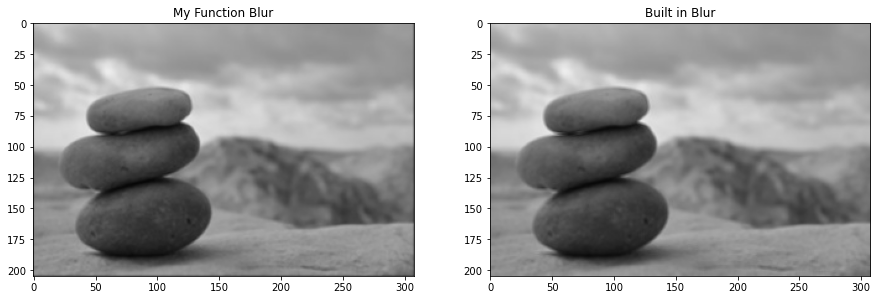

In [135]:
CompareImage('images/02_Blur.jpg','images/02_Blur01.jpg','My Function Blur','Built in Blur') #My Compare function from myfunctions.py

## Question 2.5
### Apply Different filters on different images and observe Changes

### 1. Box Filter Using Convolution:

In [136]:
imgMatrix = generateMatrix("images/08.jpg")
imgMatrix1 = generateMatrix("images/07.jpg") 
kernel=np.array([[1, 1, 1], 
                 [1, 1, 1], 
                 [1, 1, 1]])/9.0
BoxFilteredImage = convolution(imgMatrix,kernalMatrix)
BoxFilteredImage1 = convolution(imgMatrix1,kernalMatrix)

cv2.imwrite('images/08_BoxFiltered.jpg', BoxFilteredImage)
cv2.imwrite('images/07_BoxFiltered.jpg', BoxFilteredImage1)

True

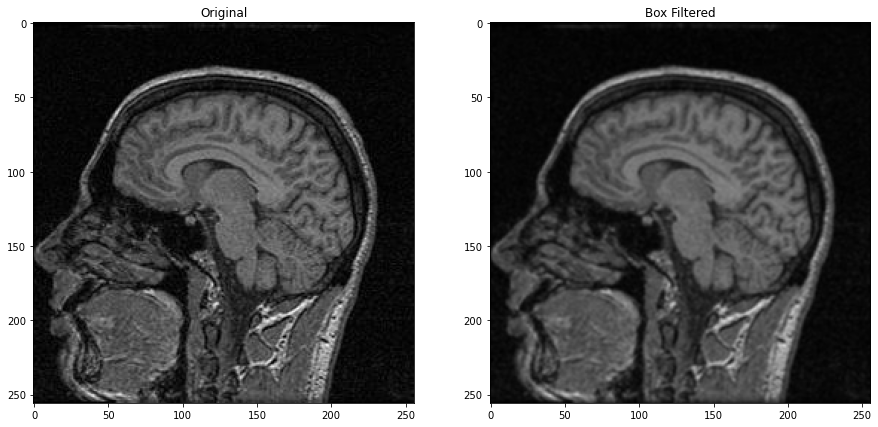

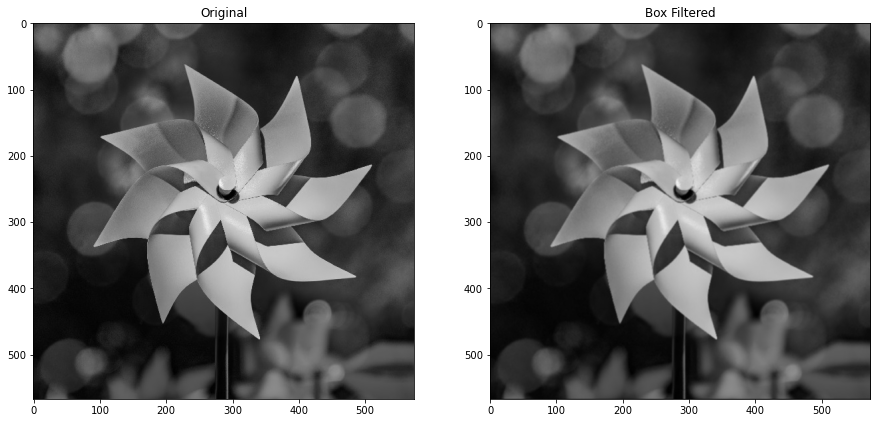

In [137]:
CompareImage('images/08.jpg','images/08_BoxFiltered.jpg','Original','Box Filtered') #My Compare function from myfunctions.py
CompareImage('images/07.jpg','images/07_BoxFiltered.jpg','Original','Box Filtered') #My Compare function from myfunctions.py

### 2. Gaussian Filter (Different Sigma Values):

In [138]:
img0 = cv2.imread('images/07.jpg',0)
img1 = cv2.imread('images/08.jpg',0)

img0Gauss2 = cv2.GaussianBlur(img0,(7,7),sigmaX=2)
img1Gauss2 = cv2.GaussianBlur(img1,(7,7),sigmaX=2)

img0Gauss3 = cv2.GaussianBlur(img0,(7,7),sigmaX=3)
img1Gauss3 = cv2.GaussianBlur(img1,(7,7),sigmaX=3)


cv2.imwrite('images/07_Gauss2.jpg',img0Gauss2)
cv2.imwrite('images/08_Gauss2.jpg',img1Gauss2)

cv2.imwrite('images/07_Gauss3.jpg',img0Gauss3)
cv2.imwrite('images/08_Gauss3.jpg',img1Gauss3)

True

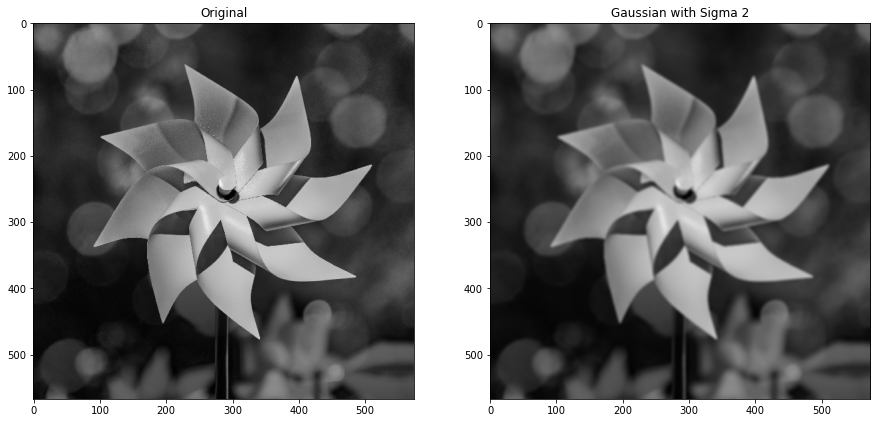

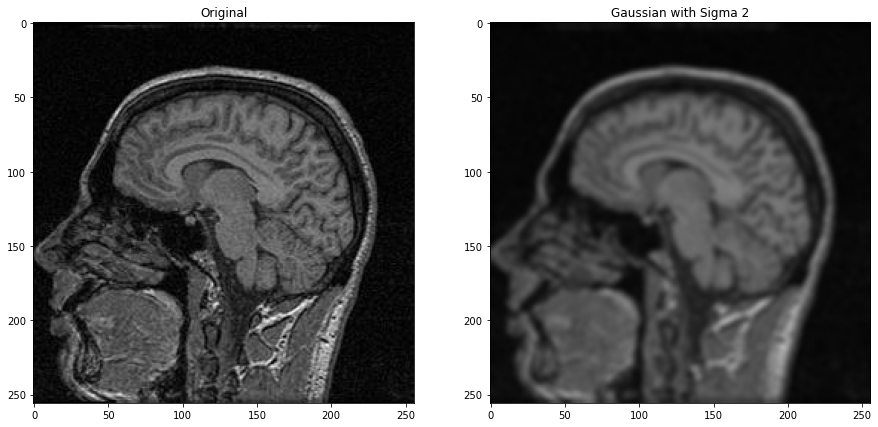

In [139]:
CompareImage('images/07.jpg','images/07_Gauss2.jpg','Original','Gaussian with Sigma 2') #My Compare function from myfunctions.py
CompareImage('images/08.jpg','images/08_Gauss2.jpg','Original','Gaussian with Sigma 2') #My Compare function from myfunctions.py

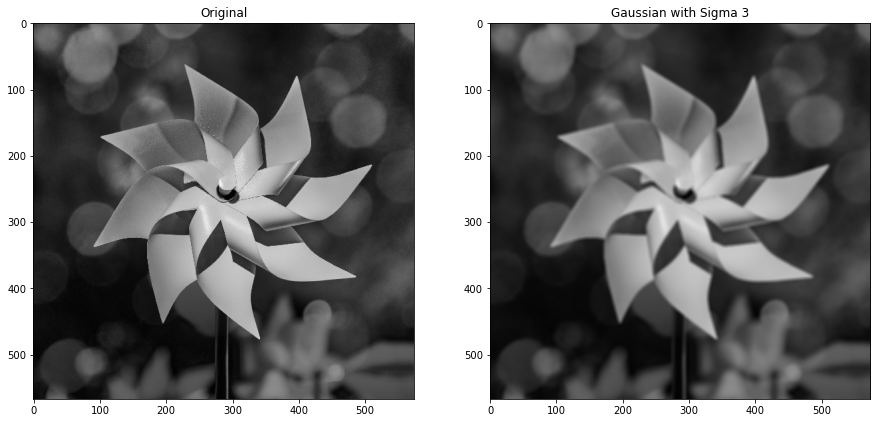

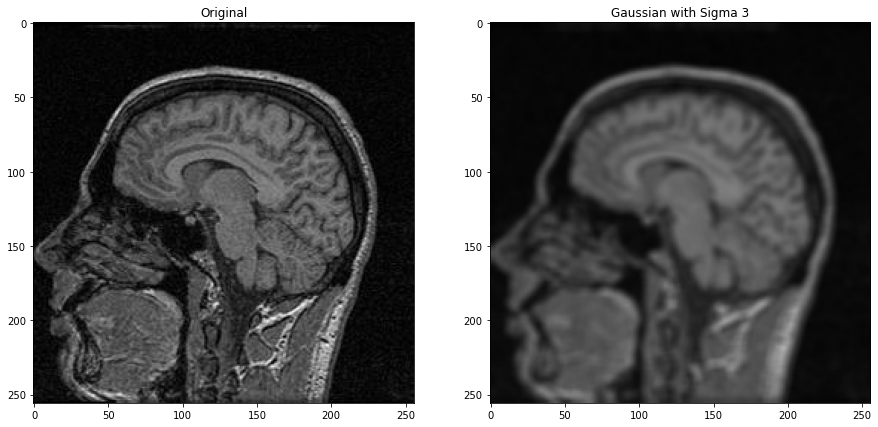

In [140]:
CompareImage('images/07.jpg','images/07_Gauss3.jpg','Original','Gaussian with Sigma 3') #My Compare function from myfunctions.py
CompareImage('images/08.jpg','images/08_Gauss3.jpg','Original','Gaussian with Sigma 3') #My Compare function from myfunctions.py

### 3. Gaussian Noise and Salt & Pepper Noise:

In [141]:
img0 = cv2.imread('images/07.jpg')
img1 = cv2.imread('images/08.jpg')

img0SPNoise = random_noise(img0, mode='s&p',amount=0.2) #add salt & pepper Noise with probability value of 0.2 
img0SPNoise = np.array(255*img0SPNoise, dtype = 'uint8')

img1SPNoise = random_noise(img1, mode='s&p',amount=0.3) #add salt & pepper Noise with probability value of 0.3
img1SPNoise = np.array(255*img1SPNoise, dtype = 'uint8')



img0GaussNoise=np.random.normal(0,1,img0.size)
img0GaussNoise=img0GaussNoise.reshape(img0.shape[0],img0.shape[1],img0.shape[2]).astype('uint8')

img1GaussNoise = np.random.normal(0,1,img1.size)
img1GaussNoise=img1GaussNoise.reshape(img1.shape[0],img1.shape[1],img1.shape[2]).astype('uint8')

img0Gauss=cv2.add(img0,img0GaussNoise)
img1Gauss=cv2.add(img1,img1GaussNoise)

cv2.imwrite('images/07_GaussNoise.jpg',img0Gauss)
cv2.imwrite('images/07_SPNoise.jpg',img0SPNoise)

cv2.imwrite('images/08_GaussNoise.jpg',img1Gauss)
cv2.imwrite('images/08_SPNoise.jpg',img1SPNoise)

True

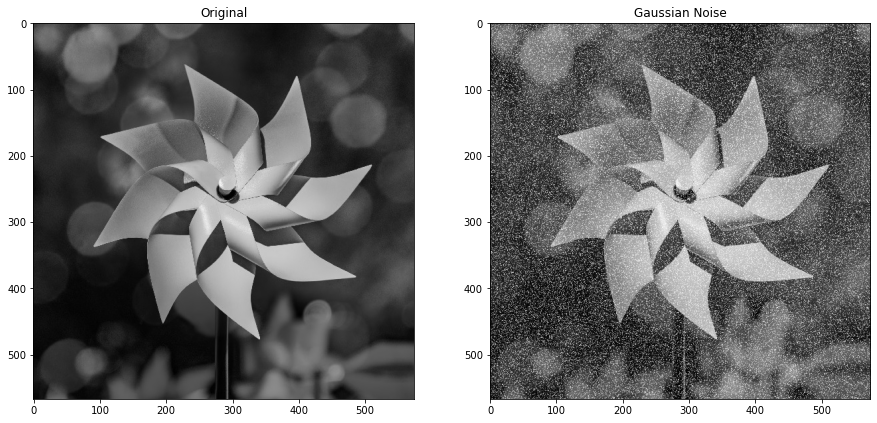

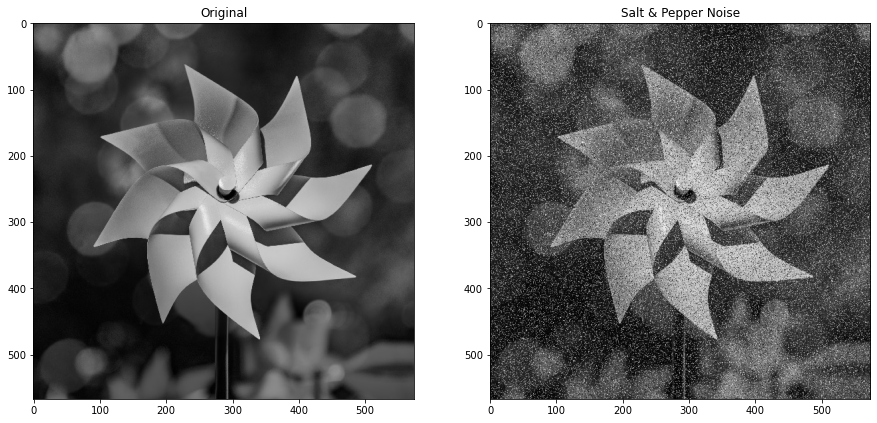

In [142]:
CompareImage('images/07.jpg','images/07_GaussNoise.jpg','Original','Gaussian Noise') #My Compare function from myfunctions.py
CompareImage('images/07.jpg','images/07_SPNoise.jpg','Original','Salt & Pepper Noise') #My Compare function from myfunctions.py

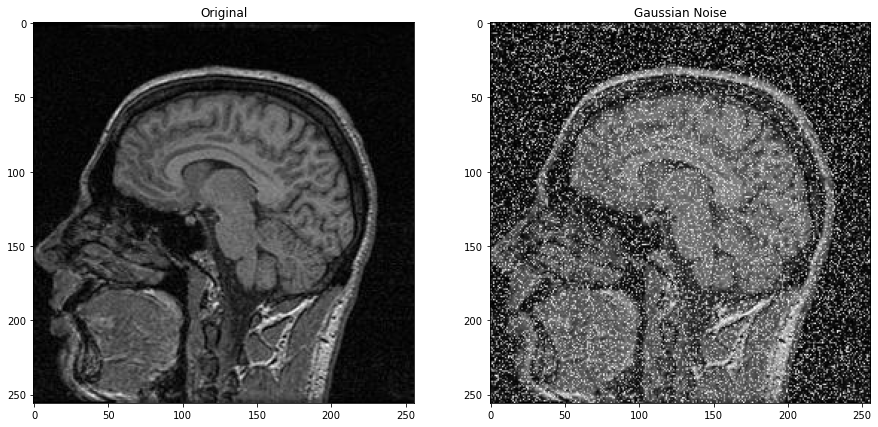

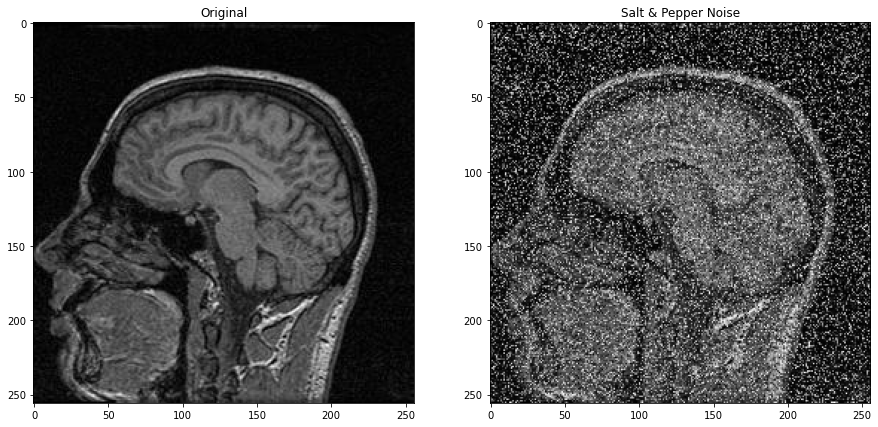

In [143]:
CompareImage('images/08.jpg','images/08_GaussNoise.jpg','Original','Gaussian Noise') #My Compare function from myfunctions.py
CompareImage('images/08.jpg','images/08_SPNoise.jpg','Original','Salt & Pepper Noise') #My Compare function from myfunctions.py

### 4. Gaussain & Median Filters

In [144]:
#Median Filter
newImage0=cv2.medianBlur(img0Gauss, 3) #Median Filter on Image with Gaussian Noise
newImage1=cv2.medianBlur(img1SPNoise, 3) #Median Filter on Image with Salt & Pepper Noise

newImage0G = cv2.GaussianBlur(img0Gauss,(5,5),sigmaX=3) #Gaussain Filter on Image with Gaussian Noise
newImage1SP = cv2.GaussianBlur(img1SPNoise,(5,5),sigmaX=6) #Gaussian Filter on Image with Salt & Pepper Noise

Text(0.5, 1.0, 'Gaussian Filter(SigmaX=3)')

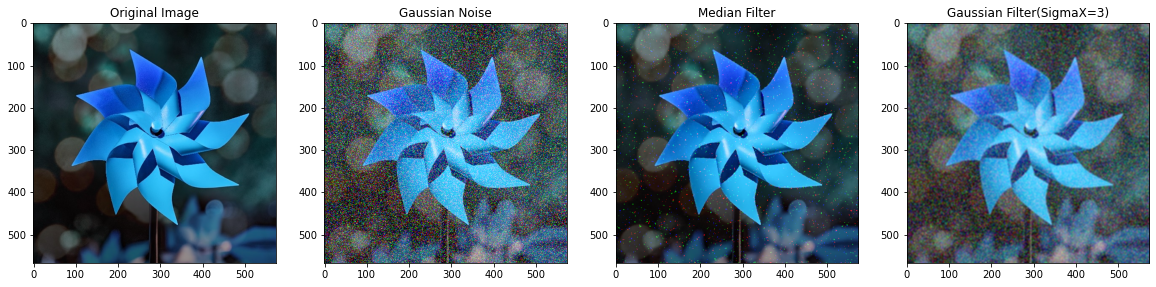

In [145]:
fig=plt.figure(figsize=(20, 20))

fig.add_subplot(2, 4, 1)
plt.imshow(img0,cmap=plt.cm.gray)
plt.title("Original Image")

fig.add_subplot(2, 4, 2)
plt.imshow(img0Gauss,cmap=plt.cm.gray)
plt.title("Gaussian Noise")

fig.add_subplot(2, 4, 3)
plt.imshow(newImage0,cmap=plt.cm.gray)
plt.title("Median Filter")

fig.add_subplot(2, 4, 4)
plt.imshow(newImage0G,cmap=plt.cm.gray)
plt.title("Gaussian Filter(SigmaX=3)")

Text(0.5, 1.0, 'Gaussian Filter(sigmaX=6)')

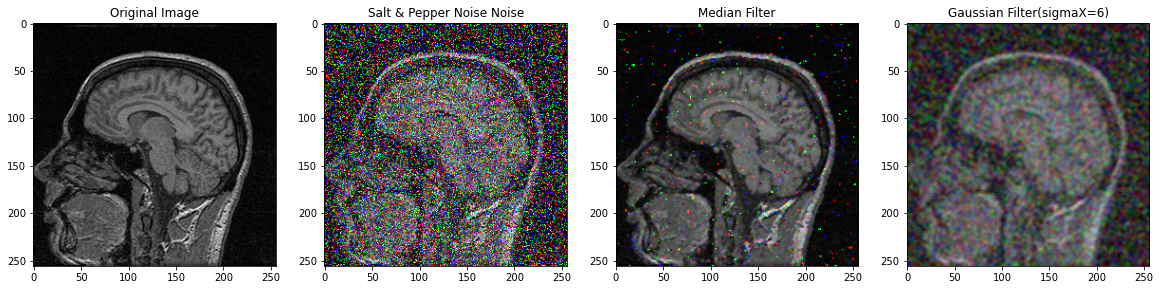

In [146]:
fig=plt.figure(figsize=(20, 20))

fig.add_subplot(3, 4, 1)
plt.imshow(img1,cmap=plt.cm.gray)
plt.title("Original Image")

fig.add_subplot(3, 4, 2)
plt.imshow(img1SPNoise,cmap=plt.cm.gray)
plt.title("Salt & Pepper Noise Noise")

fig.add_subplot(3, 4, 3)
plt.imshow(newImage1,cmap=plt.cm.gray)
plt.title("Median Filter")

fig.add_subplot(3, 4, 4)
plt.imshow(newImage1G,cmap=plt.cm.gray)
plt.title("Gaussian Filter(sigmaX=6)")

## Question 2.6
### 1. Soble Operator:

<function matplotlib.pyplot.show(*args, **kw)>

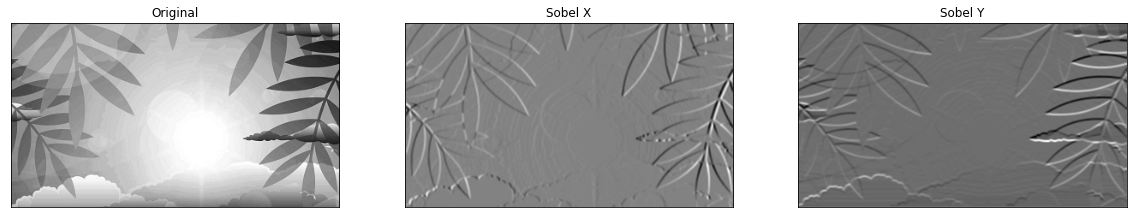

In [147]:
img = cv2.imread('images/03.png',0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

fig=plt.figure(figsize=(20, 20))

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show

### 2. Laplacian of Gaussian

(Text(0.5, 1.0, 'Laplacian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

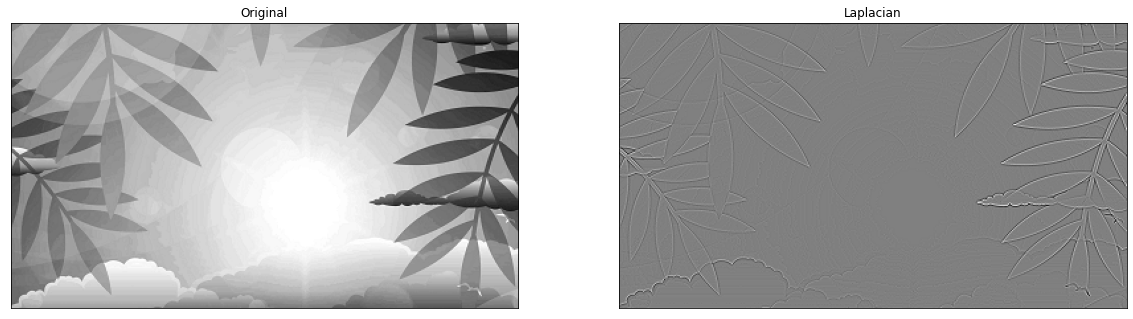

In [148]:
img = cv2.imread('images/03.png',0)

fig=plt.figure(figsize=(20, 20))
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

### 3. Canny Edge Detector:

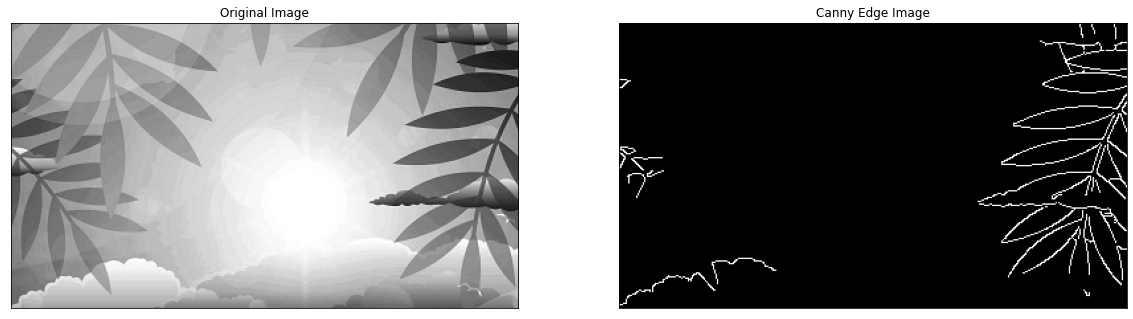

In [149]:
img = cv2.imread('images/03.png',0) #Read Image into variable img
edges = cv2.Canny(img,100,200) #Apply Canny Edge Detector using built in function

fig=plt.figure(figsize=(20, 20)) #Plot the image

plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Canny Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()